In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

Xtrain = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
Xtest = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
ytrain, ytest = y[:124], y[124:]

In [10]:
import numpy as np

from neuralnet.network import Sequential
from neuralnet.layers import LayerDense,ActivationLayer
from neuralnet.activations import tanh, sigmoid
from neuralnet.losses import mse, mse_prime

# network
net = Sequential()
net.add(LayerDense(17, 4))
net.add(ActivationLayer(sigmoid))
net.add(LayerDense(4, 1))
net.add(ActivationLayer(tanh))
# train
net.use(mse, mse_prime)
net.fit(Xtrain, ytrain, epochs=600, learning_rate=0.01)

# test
out = net.predict(Xtrain)

epoch 600/600   error=0.00    accuracy=1.00: 100%|██████████| 600/600 [00:06<00:00, 96.50it/s]


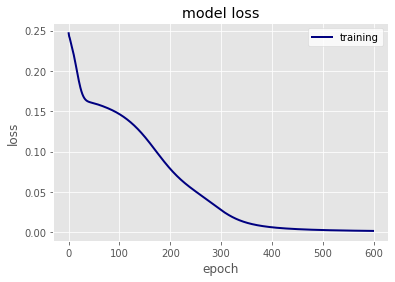

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.train_loss_history, color='navy', lw=2)
loss.set_title('model loss')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

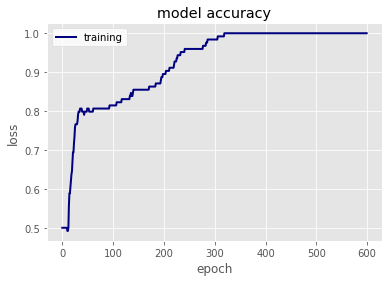

In [12]:
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.val_accuracy_history, color='navy', lw=2)
loss.set_title('model accuracy')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()